In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Reading csv data

In [2]:
comments = pd.read_csv('UScomments.csv', error_bad_lines = False)

/var/folders/vx/5_y26vjs1gbb61km87y0wkqh0000gn/T/ipykernel_26666/424416405.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv('UScomments.csv', error_bad_lines = False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/var/folders/vx/5_y26vjs1gbb61km87y0wkqh0000gn/T/ipykernel_26666/424416405.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('UScomments.csv', error_bad_lines = False)


In [3]:
comments.head(10)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8  XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9  XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0

Checking for null values

In [4]:
comments.isnull()

video_id  comment_text  likes  replies
0          False         False  False    False
1          False         False  False    False
2          False         False  False    False
3          False         False  False    False
4          False         False  False    False
...          ...           ...    ...      ...
691395     False         False  False    False
691396     False         False  False    False
691397     False         False  False    False
691398     False         False  False    False
691399     False         False  False    False

[691400 rows x 4 columns]

In [5]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

Dropping null values - comment_text has 25 missing values, those are small number, so can be dropped - dropna() function

In [6]:
comments.dropna(inplace=True)

# inplace=True: This argument specifies whether the operation should modify the DataFrame (or Series) in place, 
# meaning it will change the original object without needing to assign it to a new variable. 
# If inplace=False (the default), the method would return a new DataFrame (or Series) without missing values, 
# leaving the original one unchanged.

In [7]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [8]:
!pip install textblob

# 2. Performing Sentiment Analysis

In [9]:
from textblob import TextBlob

In [10]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [11]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [12]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity # the comment has neutral polarity

0.0

In [13]:
comments.shape

(691375, 4)

In [14]:
# performing sentiment analysis on each record of 'comment_text' column

polarity_list = []

for comment in comments['comment_text']:
    try:
        polarity_list.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity_list.append(0) # try and except - whenever an exception occurs (in this case if comment 
                                # has nothing then 0 is displayed - we are appending 0 for null values in comment)

In [16]:
len(polarity_list)

691375

In [17]:
comments['polarity'] = polarity_list

In [18]:
comments.head(10)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8  XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9  XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   

  replies  polarity  
0       0  0.000000  
1       0  0.000000  
2       0  0.000000  
3       0  0.000000  
4       0  0.000000  
5       0  0.000000  
6       0  0.000000  
7       0  0.000000  
8       0  0.800000  
9       0 -0.135714

# 3. Word Cloud Analysis

In [19]:
filter1 = comments['polarity'] == 1

In [20]:
comments_positive = comments[filter1]

In [21]:
comments_positive.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [22]:
filter2 = comments['polarity'] == -1

In [23]:
comments_negative = comments[filter2]

In [24]:
comments_negative.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [25]:
!pip install wordcloud

In [27]:
from wordcloud import WordCloud, STOPWORDS  # STOPWORDS - meaningless words like the, to, a... 
                                            # (doesn't make any sense to the analysis)

In [29]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [30]:
type(comments['comment_text'])

pandas.core.series.Series

In [38]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [46]:
wordcloud_positive = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

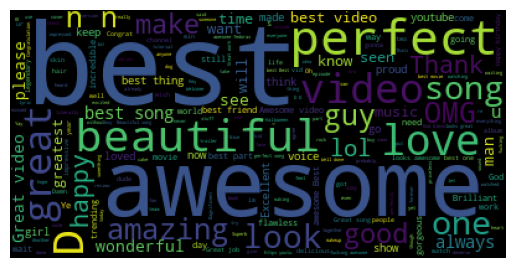

In [47]:
plt.imshow(wordcloud_positive)
plt.axis('off')

# plt.imshow(): This function from Matplotlib displays an image on a plot, and in this case, it will visualize 
# the word cloud.

In [43]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [44]:
wordcloud_negative = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

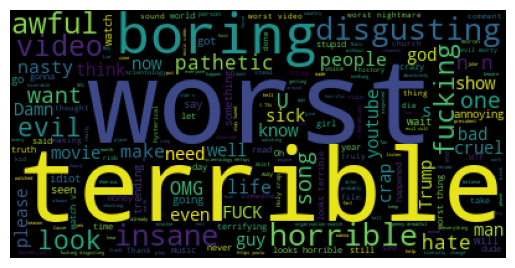

In [45]:
plt.imshow(wordcloud_negative)
plt.axis('off')

# 4. Perform Emoji's Analysis

In [49]:
!pip install emoji==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 4.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=4437b6fab30a70b2abfd64f1d4e588764df0f56a5659b677d67f3a3e528f32d3
  Stored in directory: /Users/sahithikadudula/Library/Caches/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [50]:
import emoji

In [52]:
emoji.__version__

'2.2.0'

In [53]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [56]:
comment_emoji = 'Ven a mexico! 😍 te amo LP'

In [60]:
[char for char in comment_emoji if char in emoji.EMOJI_DATA] #list comprehension

['😍']

In [61]:
#simple way

emoji_list = []
for char in comment_emoji:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

In [62]:
emoji_list

['😍']

In [73]:
# same way to do for entire comment_text column

all_emoji_list = []
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)        

In [ ]:
all_emoji_list

In [74]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [75]:
from collections import Counter

In [77]:
Counter(all_emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [78]:
Counter(all_emoji_list).most_common(10)[0]

('😂', 36987)

In [79]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [80]:
Counter(all_emoji_list).most_common(10)[1][0]

'😍'

In [81]:
Counter(all_emoji_list).most_common(10)[2][0]

'❤'

In [83]:
emojis = [Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]

In [89]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [85]:
Counter(all_emoji_list).most_common(10)[0][1]

36987

In [86]:
Counter(all_emoji_list).most_common(10)[1][1]

33453

In [87]:
Counter(all_emoji_list).most_common(10)[2][1]

31119

In [88]:
freqs = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]

In [90]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [91]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [93]:
trace = go.Bar(x=emojis, y=freqs)

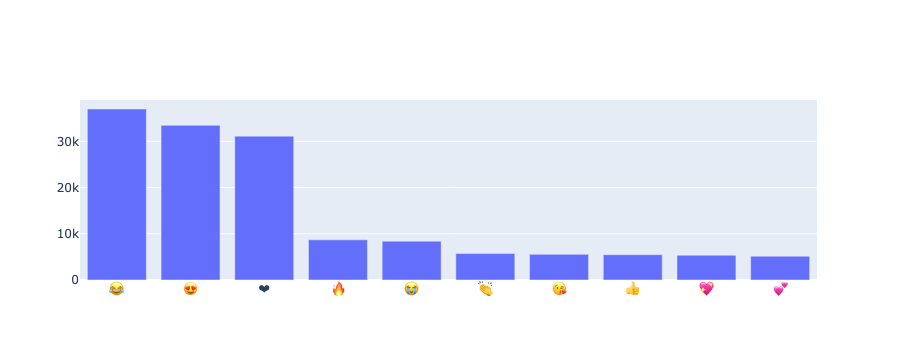

In [94]:
iplot([trace])

# 5. Collect Entire data of Youtube !

In [95]:
import os

In [99]:
files = os.listdir('/Users/sahithikadudula/Downloads/1-Text Data Analysis (YouTube Case-Study)/additional_data')

In [100]:
files

['IN_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'JP_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'DEvideos.csv',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'CAvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 'US_category_id.json',
 'DE_category_id.json',
 'USvideos.csv',
 'GBvideos.csv']

In [102]:
files_csv = [file for file in files if '.csv' in file]

In [103]:
files_csv

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [105]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [107]:
full_df = pd.DataFrame()

path = '/Users/sahithikadudula/Downloads/1-Text Data Analysis (YouTube Case-Study)/additional_data'
 
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1', error_bad_lines=False)
    
    full_df = pd.concat([full_df, current_df], ignore_index=True)

In [109]:
full_df.shape

(375942, 16)

# 6. Exporting the data into csv, json and db

In [112]:
full_df[full_df.duplicated()].shape  

# There are 36417 duplicated records/rows

(36417, 16)

In [113]:
full_df = full_df.drop_duplicates()

In [114]:
full_df.shape

#After dropping the duplicated rows, there are 339525 rows in full_df

(339525, 16)

In [118]:
# exporting to csv
# full_df.to_csv('/Users/sahithikadudula/Downloads/1-Text Data Analysis (YouTube Case-Study)/Exported data/youtube_sample.csv', index = False)

# saving 1000 records
full_df[0:1000].to_csv('/Users/sahithikadudula/Downloads/1-Text Data Analysis (YouTube Case-Study)/Exported data/youtube_sample.csv', index = False)

In [119]:
# exporting to json
full_df[0:1000].to_json(r'/Users/sahithikadudula/Downloads/1-Text Data Analysis (YouTube Case-Study)/Exported data/youtube_sample.json')

In [122]:
# exporting to db
from sqlalchemy import create_engine

engine = create_engine('sqlite:////Users/sahithikadudula/Downloads/1-Text Data Analysis (YouTube Case-Study)/Exported data/youtube_sample.sqlite')

In [123]:
full_df[0:1000].to_sql('Users', con=engine, if_exists='append')

1000

# 7. Which category has maximum likes!?

In [125]:
full_df.head()

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link  \
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Disfruta la presencia del Chef Torreblanca en ...  
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...  
2  La canciÃ³n del principio se llama âEste esp...  
3  El video es de un Walmart en el pais centroame...  
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...

In [126]:
full_df['category_id'].unique()

array([24, 22, 25, 26, 10, 23, 17,  2,  1, 29, 27, 28, 20, 15, 19, 43, 30,
       44])

In [128]:
json_df = pd.read_json('/Users/sahithikadudula/Downloads/1-Text Data Analysis (YouTube Case-Study)/additional_data/US_category_id.json')

In [129]:
json_df

kind  \
0   youtube#videoCategoryListResponse   
1   youtube#videoCategoryListResponse   
2   youtube#videoCategoryListResponse   
3   youtube#videoCategoryListResponse   
4   youtube#videoCategoryListResponse   
5   youtube#videoCategoryListResponse   
6   youtube#videoCategoryListResponse   
7   youtube#videoCategoryListResponse   
8   youtube#videoCategoryListResponse   
9   youtube#videoCategoryListResponse   
10  youtube#videoCategoryListResponse   
11  youtube#videoCategoryListResponse   
12  youtube#videoCategoryListResponse   
13  youtube#videoCategoryListResponse   
14  youtube#videoCategoryListResponse   
15  youtube#videoCategoryListResponse   
16  youtube#videoCategoryListResponse   
17  youtube#videoCategoryListResponse   
18  youtube#videoCategoryListResponse   
19  youtube#videoCategoryListResponse   
20  youtube#videoCategoryListResponse   
21  youtube#videoCategoryListResponse   
22  youtube#videoCategoryListResponse   
23  youtube#videoCategoryListResponse   
24  youtube#videoCategoryListResponse   
25  youtube#videoCategoryListResponse   
26  youtube#videoCategoryListResponse   
27  youtube#videoCategoryListResponse   
28  youtube#videoCategoryListResponse   
29  youtube#videoCategoryListResponse   
30  youtube#videoCategoryListResponse   
31  youtube#videoCategoryListResponse   

                                                 etag  \
0   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
5   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
6   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
7   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
8   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
9   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
10  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
11  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
12  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
13  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
14  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
15  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
16  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
17  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
18  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
19  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
20  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
21  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
22  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
23  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
24  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
25  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
26  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
27  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
28  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
29  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
30  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
31  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                                items  
0   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
5   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
6   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
7   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
8   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
9   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
10  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
11  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
12  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
13  {'kind': 

In [131]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [132]:
json_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [133]:
category_dict = {}

for item in json_df['items'].values:
    category_dict[int(item['id'])] = item['snippet']['title']

In [134]:
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [136]:
full_df['category_name'] = full_df['category_id'].map(category_dict)

In [138]:
full_df.insert(5, 'category_name', full_df.pop('category_name'))

In [139]:
full_df.head(10)

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   
5  Q9kK6NWZR1U      17.14.11   
6  c9VTD3n_IDs      17.14.11   
7  XzULSsZYMRc      17.14.11   
8  uijjYNtl_UM      17.14.11   
9  cOJ68MQm2ac      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   
5  Asi se sintio Terremoto en iraq al bordo de ir...   
6  La Resolana con el Capi | Programa 12 noviembr...   
7  M6.7 Costa Rica AnÃ¡lisis de Terremotos en (((...   
8  7 NiÃ±os Famosos Que No Supieron Adaptarse a L...   
9  TOP: Los 7 libros infantiles mÃ¡s perturbadore...   

               channel_title  category_id    category_name  \
0            MasterChef 2017           24    Entertainment   
1   Micky Contreras Martinez           22   People & Blogs   
2  El Pulso De La RepÃºblica           25  News & Politics   
3                   Casanare           25  News & Politics   
4                      Musas           26    Howto & Style   
5  MÃSICA & ENTRETENIMIENTO           10            Music   
6                La Resolana           22   People & Blogs   
7            concienciaradio           25  News & Politics   
8         Los mejores Top 10           24    Entertainment   
9               DrossRotzank           24    Entertainment   

               publish_time  \
0  2017-11-13T06:06:22.000Z   
1  2017-11-13T05:11:58.000Z   
2  2017-11-13T17:00:02.000Z   
3  2017-11-13T03:47:10.000Z   
4  2017-11-13T19:17:48.000Z   
5  2017-11-12T20:17:38.000Z   
6  2017-11-13T07:00:03.000Z   
7  2017-11-13T06:18:23.000Z   
8  2017-11-12T19:54:12.000Z   
9  2017-11-12T21:14:44.000Z   

                                                tags    views  likes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...   310130   4182   
1                                    La Voz Mexico 7   104972    271   
2  Chumel Torres|"El Pulso de la Republica"|"noti...   136064  10105   
3         temblor|"costa rica"|"sismo en costa rica"    96153    378   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...   499965  57781   
5                                             [none]   129645    506   
6  la resolana|"la resolana con el capi"|"tv azte...    75197   2277   
7  terremoto|"costa rica"|"nicaragua"|"alex backm...   142522   7745   
8  los mejores top 10|"top 10 niÃ±os"|"top 10"|"t...   371110  20155   
9  libros infantiles|"Dross"|"terror"|"horror"|"m...  1111314  83582   

   dislikes  comment_count                                  thumbnail_link  \
0       361           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1       174            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2       266            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3       171            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4       681           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   
5        67            239  https://i.ytimg.com/vi/Q9kK6NWZR1U/default.jpg   
6        69            164  https://i.ytimg.com/vi/c9VTD3n_IDs/default.jpg   
7       659              0  https://i.ytimg.com/vi/XzULSsZYMRc/default.jpg   
8       912            766  https://i.ytimg.com/vi/uijjYNtl_UM/default.jpg   
9      2194           9106  https://i.ytimg.com/vi/cOJ68MQm2ac/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False         

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'People & Blogs'),
  Text(2, 0, 'News & Politics'),
  Text(3, 0, 'Howto & Style'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Autos & Vehicles'),
  Text(8, 0, 'Film & Animation'),
  Text(9, 0, 'Nonprofits & Activism'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Science & Technology'),
  Text(12, 0, 'Gaming'),
  Text(13, 0, 'Pets & Animals'),
  Text(14, 0, 'Travel & Events'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

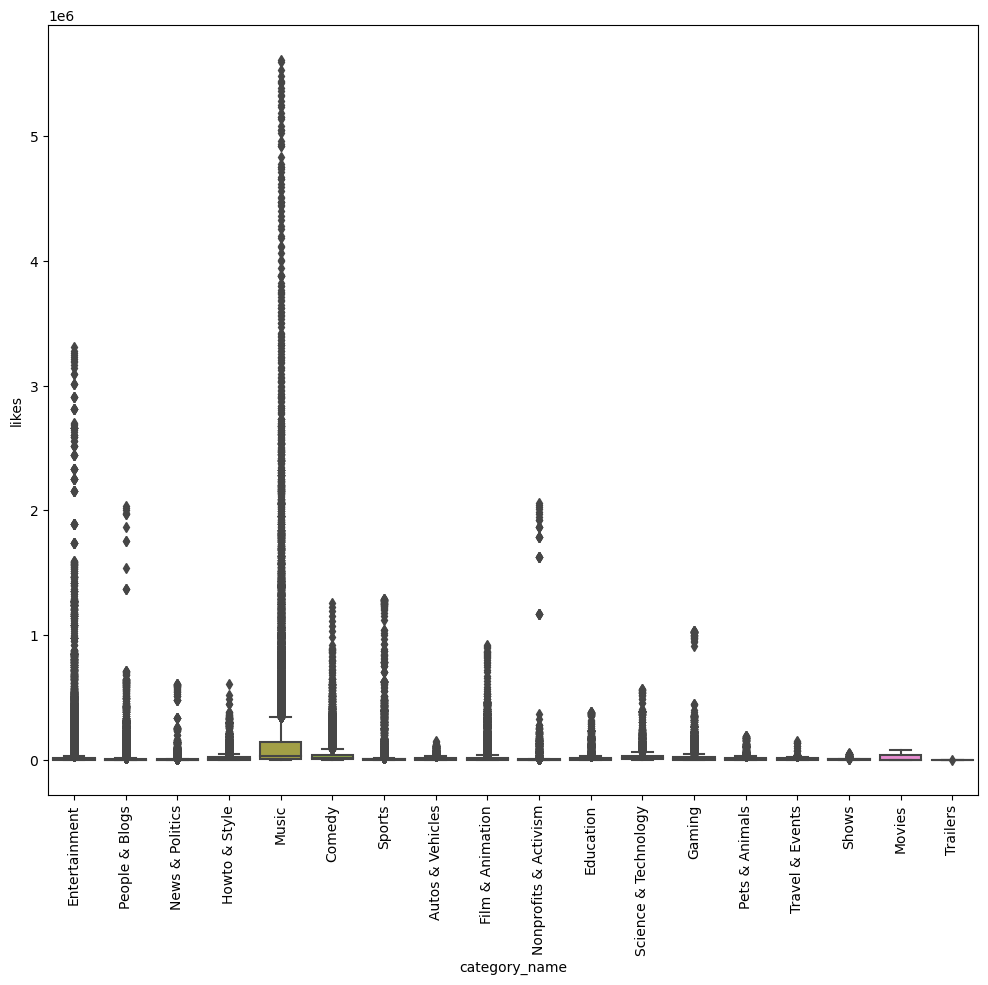

In [143]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'category_name', y = 'likes', data = full_df)
plt.xticks(rotation = 'vertical')

# 8. Analyze whether audience are engaged or not

In [146]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [148]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'category_name', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description',
       'like_rate', 'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [149]:
full_df.head()

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id    category_name  \
0            MasterChef 2017           24    Entertainment   
1   Micky Contreras Martinez           22   People & Blogs   
2  El Pulso De La RepÃºblica           25  News & Politics   
3                   Casanare           25  News & Politics   
4                      Musas           26    Howto & Style   

               publish_time  \
0  2017-11-13T06:06:22.000Z   
1  2017-11-13T05:11:58.000Z   
2  2017-11-13T17:00:02.000Z   
3  2017-11-13T03:47:10.000Z   
4  2017-11-13T19:17:48.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link  \
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  like_rate  dislike_rate  \
0  Disfruta la presencia del Chef Torreblanca en ...   1.348467      0.116403   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   0.258164      0.165758   
2  La canciÃ³n del principio se llama âEste esp...   7.426652      0.195496   
3  El video es de un Walmart en el pais centroame...   0.393123      0.177842   
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...  11.557009      0.136210   

   comment_count_rate  
0            0.592010  
1            0.351522  
2            0.446114  
3            0.216322  
4            1.485704

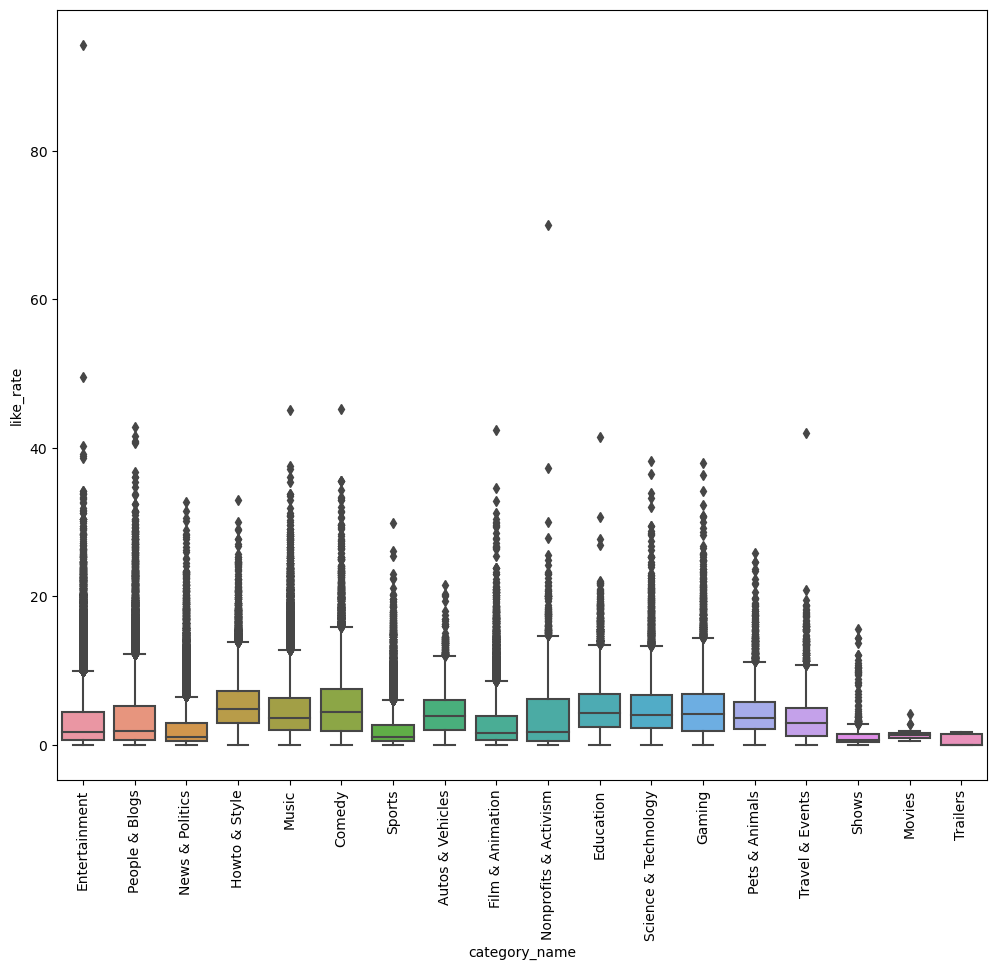

In [150]:
plt.figure(figsize=(12,10))
sns.boxplot(x='category_name', y='like_rate', data = full_df)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='views', ylabel='likes'>

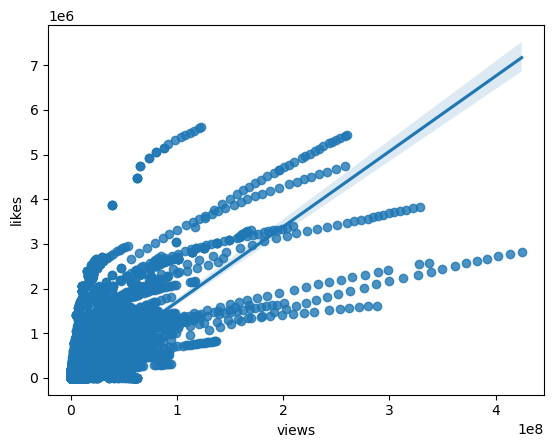

In [151]:
sns.regplot(x='views', y='likes', data = full_df)

# there is a positive linear relationship between views and likes, as views increase likes also increases.

In [152]:
full_df[['views', 'likes', 'dislikes']].corr()

# if views are increased by 100 then likes will be increased by 78 approximately.

views     likes  dislikes
views     1.000000  0.779531  0.405428
likes     0.779531  1.000000  0.451809
dislikes  0.405428  0.451809  1.000000

<AxesSubplot:>

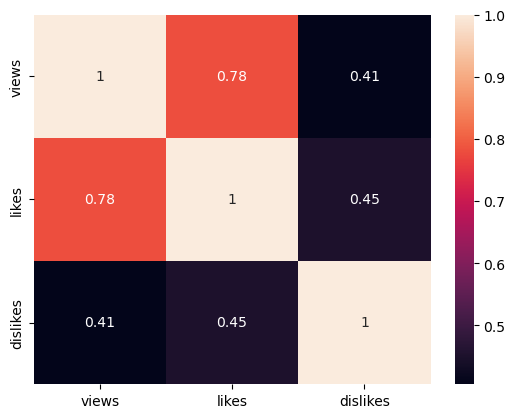

In [154]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot=True)

# 9. Analyzing the channels which have largest number of trending videos

In [155]:
full_df['channel_title'].value_counts()

The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
ABIZ ENT BUZZ                           1
JENNYMOMENT                             1
Drache Offiziell                        1
Jules                                   1
The Chainsmokers                        1
Name: channel_title, Length: 37824, dtype: int64

In [161]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [162]:
cdf

channel_title    0
0      The Late Show with Stephen Colbert  710
1                                     WWE  643
2             Late Night with Seth Meyers  592
3                            TheEllenShow  555
4                       Jimmy Kimmel Live  528
...                                   ...  ...
37819                            Kd Malts    1
37820                            Zedan TV    1
37821            Kc Kelly - Rocketprenuer    1
37822                               Kbaby    1
37823                    Pavel Sidorik TV    1

[37824 rows x 2 columns]

In [163]:
cdf = cdf.rename(columns={0:'total_videos'})

In [164]:
cdf 

channel_title  total_videos
0      The Late Show with Stephen Colbert           710
1                                     WWE           643
2             Late Night with Seth Meyers           592
3                            TheEllenShow           555
4                       Jimmy Kimmel Live           528
...                                   ...           ...
37819                            Kd Malts             1
37820                            Zedan TV             1
37821            Kc Kelly - Rocketprenuer             1
37822                               Kbaby             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

In [165]:
import plotly.express as px

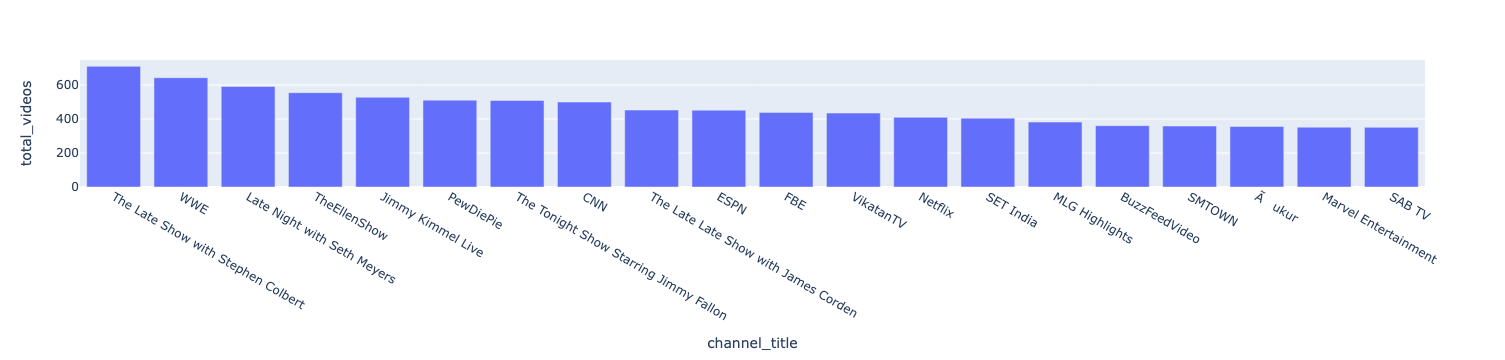

In [167]:
px.bar(data_frame = cdf[0:20], x='channel_title', y='total_videos')

# 10 . Does punctuations have an impact on views, likes and dislikes?

In [175]:
full_df.head()

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id    category_name  \
0            MasterChef 2017           24    Entertainment   
1   Micky Contreras Martinez           22   People & Blogs   
2  El Pulso De La RepÃºblica           25  News & Politics   
3                   Casanare           25  News & Politics   
4                      Musas           26    Howto & Style   

               publish_time  \
0  2017-11-13T06:06:22.000Z   
1  2017-11-13T05:11:58.000Z   
2  2017-11-13T17:00:02.000Z   
3  2017-11-13T03:47:10.000Z   
4  2017-11-13T19:17:48.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link  \
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  like_rate  dislike_rate  \
0  Disfruta la presencia del Chef Torreblanca en ...   1.348467      0.116403   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   0.258164      0.165758   
2  La canciÃ³n del principio se llama âEste esp...   7.426652      0.195496   
3  El video es de un Walmart en el pais centroame...   0.393123      0.177842   
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...  11.557009      0.136210   

   comment_count_rate  
0            0.592010  
1            0.351522  
2            0.446114  
3            0.216322  
4            1.485704

In [178]:
full_df['title'][1]

'ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUNCIA A Â¨La Voz Mexico 7Â¨TELEVISA 11/11/2017'

In [170]:
import string

In [171]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [191]:
len([char for char in full_df['title'][1] if char in string.punctuation])

3

In [192]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [193]:
sample = full_df[0:1000]

In [194]:
sample['count_punc'] = sample['title'].apply(punc_count)

In [195]:
sample['count_punc']

0      1
1      3
2      1
3      1
4      1
      ..
995    6
996    0
997    7
998    4
999    0
Name: count_punc, Length: 1000, dtype: int64

In [196]:
full_df['title'].apply(punc_count)

0         1
1         3
2         1
3         1
4         1
         ..
375937    4
375938    3
375939    4
375940    6
375941    5
Name: title, Length: 339525, dtype: int64

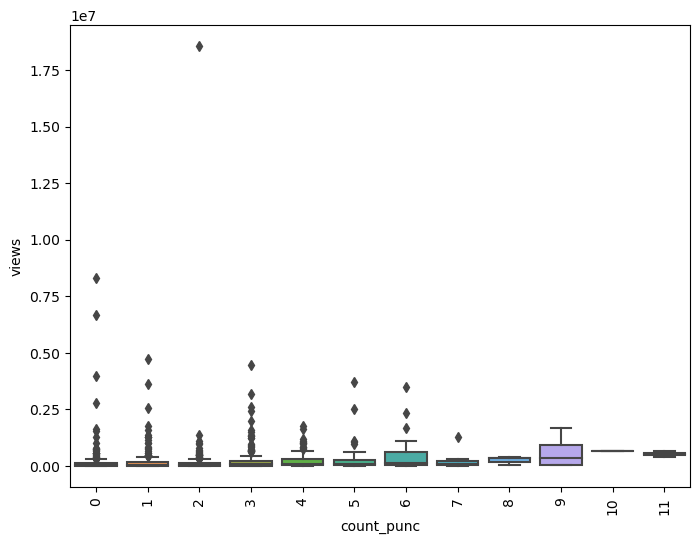

In [197]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc', y='views', data=sample)
plt.xticks(rotation='vertical')
plt.show()

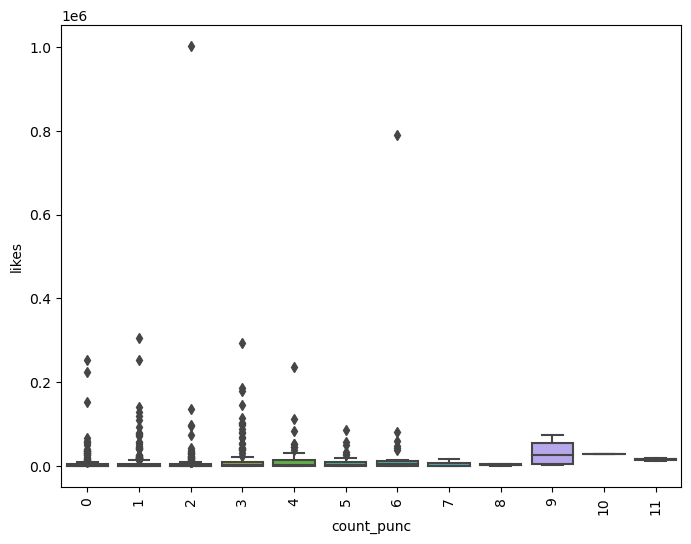

In [198]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc', y='likes', data=sample)
plt.xticks(rotation='vertical')
plt.show()